In [1]:
import pandas as pd
import numpy as np
transitions = pd.read_csv('koniczyna/transitions', sep=' ', header=None).values
nodes = pd.read_csv('koniczyna/nodes', sep=' ', names=['birth_rate', 'lifetime'])
nodes.index += 1

In [2]:
nodes

,birth_rate,lifetime
1,1,1
2,1,1
3,0,1
4,0,1
5,0,1


In [4]:
birth_rates

,birth_rate,lifetime
1,1,1
2,1,1


In [55]:
import numpy as np

In [ ]:
history = []

In [57]:
current_state_arr = []
for ind, row in birth_rates.iterrows():
    N = np.random.poisson(t * a_N)
    births = np.random.uniform(0, t, N)
    df = pd.DataFrame({'enter_time': births, 'node': ind})
    current_state_arr.append(df)
    print(row)

birth_rate    1
lifetime      1
Name: 1, dtype: int64
birth_rate    1
lifetime      1
Name: 2, dtype: int64


In [58]:
current_state = pd.concat(current_state_arr).reset_index(drop=True)

In [ ]:
history = [current_state]

In [59]:
current_state

,enter_time,node
0,7.152061,1
1,6.316005,1
2,9.465893,1
3,0.996260,1
4,2.733299,1
5,2.158026,1
6,1.691188,1
7,8.566283,1
8,3.815373,1
9,1.111803,2


In [60]:
nodes.loc[1, 'lifetime']

1

In [61]:
t = 5

In [62]:
NODES = 5
current_node = 1

active_points = current_state[current_state['enter_time'] < t]
active_points_in_curr_node = active_points[active_points['node'] == current_node]

curr_lifetime = nodes.loc[current_node, 'lifetime']
num_points = active_points_in_curr_node.shape[0]

live_times = np.random.exponential(1 / curr_lifetime, num_points)
new_nodes = np.random.choice(transitions.shape[1], size=num_points, p=transitions[current_node])

In [63]:
live_times

array([2.11829022, 0.0641332 , 0.34156699, 0.14519738, 0.42234142])

In [64]:
current_state.loc[active_points_in_curr_node.index, 'enter_time'] 

3    0.996260
4    2.733299
5    2.158026
6    1.691188
8    3.815373
Name: enter_time, dtype: float64

In [65]:
current_state

,enter_time,node
0,7.152061,1
1,6.316005,1
2,9.465893,1
3,0.996260,1
4,2.733299,1
5,2.158026,1
6,1.691188,1
7,8.566283,1
8,3.815373,1
9,1.111803,2


In [66]:
history = []
history.append(current_state.loc[active_points_in_curr_node.index])

In [67]:
current_state.loc[active_points_in_curr_node.index, 'enter_time'] += live_times

In [68]:
current_state.loc[active_points_in_curr_node.index, 'node'] = new_nodes

In [69]:
current_state.loc[active_points_in_curr_node.index]

,enter_time,node
3,3.114550,4
4,2.797432,3
5,2.499593,3
6,1.836385,4
8,4.237714,3


In [70]:
history[0]

,enter_time,node
3,0.996260,1
4,2.733299,1
5,2.158026,1
6,1.691188,1
8,3.815373,1


In [31]:
current_state.loc[active_points_in_curr_node.index]

,enter_time,node
4,0.820076,1
6,0.807501,1
7,3.179483,1
11,4.686658,1
13,5.174237,1


In [30]:
active_points_in_curr_node

,enter_time,node
4,0.521795,1
6,0.804767,1
7,2.423196,1
11,2.384739,1
13,4.653046,1


In [2]:
t = 10
a_N = 1

In [32]:
history = []
current_state_arr = []
birth_rates = nodes[nodes['birth_rate'] > 0]
for ind, row in birth_rates.iterrows():
    N = np.random.poisson(t * row['birth_rate'])
    births = np.random.uniform(0, t, N)
    df = pd.DataFrame({'time': births, 'node_entered': ind, 'node_left': 0})
    current_state_arr.append(df)
    print(row)
    
current_state = pd.concat(current_state_arr).reset_index(drop=True)
history = [current_state.copy()]

birth_rate    1
lifetime      1
Name: 1, dtype: int64
birth_rate    1
lifetime      1
Name: 2, dtype: int64


In [33]:
history

[        time  node_entered  node_left
 0   4.469223             1          0
 1   9.004152             1          0
 2   7.273523             1          0
 3   8.155973             1          0
 4   6.009831             1          0
 5   3.334150             1          0
 6   7.269208             2          0
 7   9.013079             2          0
 8   3.738775             2          0
 9   5.248263             2          0
 10  3.819249             2          0
 11  0.560477             2          0
 12  3.350451             2          0
 13  6.494337             2          0]

In [34]:
NODES = transitions.shape[0]
current_node = 1
while current_state.loc[current_state['node_entered'] != 0,'time'].min() < t:
    print(current_node)
    print((pd.concat(history)['node_left'] == 0).sum())
    active_points = current_state[(current_state['node_entered'] != 0) & (current_state['time'] < t)]
    active_points_in_curr_node = active_points[active_points['node_entered'] == current_node]
    
    curr_lifetime = nodes.loc[current_node, 'lifetime']
    num_points = active_points_in_curr_node.shape[0]
    
    live_times = np.random.exponential(1 / curr_lifetime, num_points)
    new_nodes = np.random.choice(NODES+1, size=num_points, p=transitions[current_node-1])
    
    current_state.loc[active_points_in_curr_node.index, 'time'] += live_times
    current_state.loc[active_points_in_curr_node.index, 'node_entered'] = new_nodes
    current_state.loc[active_points_in_curr_node.index, 'node_left'] = current_node
    
    
    history.append(current_state.loc[active_points_in_curr_node.index].copy())
    current_node = current_node % NODES + 1

1
14
2
14
3
14
4
14
5
14
1
14
2
14
3
14
4
14
5
14
1
14
2
14
3
14


In [35]:
df_history = pd.concat(history)

In [36]:
df_history

,time,node_entered,node_left
0,4.469223,1,0
1,9.004152,1,0
2,7.273523,1,0
3,8.155973,1,0
4,6.009831,1,0
5,3.334150,1,0
6,7.269208,2,0
7,9.013079,2,0
8,3.738775,2,0
9,5.248263,2,0


In [37]:
df_history[df_history['node_left'] == 0]

,time,node_entered,node_left
0,4.469223,1,0
1,9.004152,1,0
2,7.273523,1,0
3,8.155973,1,0
4,6.009831,1,0
5,3.334150,1,0
6,7.269208,2,0
7,9.013079,2,0
8,3.738775,2,0
9,5.248263,2,0


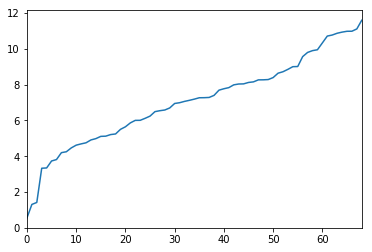

In [39]:
df_history['time'].sort_values().reset_index()['time'].plot()

In [72]:
5 % 6

5

In [21]:
t = 10

In [23]:
a_N = 1

In [24]:


N = np.random.poisson(t * a_N)
births = np.random.uniform(0, t, N)

In [25]:
births

array([1.87036832, 0.61853989, 4.95589769, 3.67799814, 7.58213055,
       3.20088814, 1.62218868, 4.83161892, 2.43369644])

In [35]:
np.random.choice(transitions.shape[1], size=10, p=transitions[0])

array([3, 3, 3, 4, 4, 4, 3, 3, 4, 3])

In [33]:
transitions

array([[0.  , 0.  , 0.  , 0.5 , 0.5 , 0.  ],
       [0.  , 0.  , 0.  , 0.5 , 0.5 , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.25, 0.75],
       [0.  , 0.  , 0.  , 0.25, 0.  , 0.75],
       [0.5 , 0.25, 0.25, 0.  , 0.  ,  nan]])